In [ ]:
# IMPORTING LIBRARIES
import os
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, random_split
from torchvision import datasets, transforms
import PIL

# **Model**

In [ ]:
# Define transformation: resize, grayscale, and tensor conversion.
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

# Create train, val and test datasets
full_dataset = datasets.Caltech101(root='./data', download=True, transform=transform)

# we are going to use only these two classes
selected_classes = ['Faces', 'Faces_easy']
indices = [i for i, (img, label) in enumerate(full_dataset) if full_dataset.categories[label] in selected_classes]
subset = Subset(full_dataset, indices)
train_dataset, val_dataset, test_dataset = random_split(subset, [100, 500, 270])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.fc1 = nn.Linear(input_size, 15)
        self.fc2 = nn.Linear(15, 45)
        self.fc3 = nn.Linear(45, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x) # activation 1
        x = self.fc2(x)
        x = self.relu(x) # activation 2
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Instantiate the model
input_size = 32 * 32 * 1  # Input size of the images
num_classes = 2  # Number of classes
model = LogisticRegression(input_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

model.to(DEVICE)

start_time = time.time()
minibatch_loss_list, train_acc_list, val_acc_list, test_acc_list = [], [], [], []

for epoch in range(NUM_EPOCHS):
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
        features = features.to(device)
        targets = targets.to(device)

        # Forward pass
        logits = model(features)
        loss = criterion(logits, targets)

        # Zero gradients, backprop, and update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        minibatch_loss_list.append(loss.item())
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} '
                  f'| Batch {batch_idx:04d}/{len(train_loader):04d} '
                  f'| Loss: {loss.item():.4f}')

    # Evaluate on training and validation sets
    model.eval()
    with torch.no_grad():
        train_acc = compute_accuracy(model, train_loader, device=DEVICE)
        test_acc = compute_accuracy(model, test_loader, device=DEVICE)
        val_acc = compute_accuracy(model, val_loader, device=DEVICE)
        print(f'Epoch: {epoch+1:03d}/{SETTINGS["num epochs"]:03d} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Test Acc: {test_acc:.2f}%')
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        val_acc_list.append(val_acc)

    elapsed = (time.time() - start_time) / 60
    print(f'Time elapsed: {elapsed:.2f} min')

elapsed = (time.time() - start_time) / 60
print(f'Total Training Time: {elapsed:.2f} min')

# Evaluate on the test set
test_acc = compute_accuracy(model, test_loader, device=device)
print(f'Test Accuracy: {test_acc:.2f}%')

Files already downloaded and verified
Epoch: 001/100 | Batch 0000/0007 | Loss: 0.7002
Epoch: 001/100 | Train Acc: 72.00% | Test Acc: 75.19%
Time elapsed: 0.01 min
Epoch: 002/100 | Batch 0000/0007 | Loss: 0.6322
Epoch: 002/100 | Train Acc: 60.00% | Test Acc: 53.70%
Time elapsed: 0.02 min
Epoch: 003/100 | Batch 0000/0007 | Loss: 0.4179
Epoch: 003/100 | Train Acc: 49.00% | Test Acc: 49.63%
Time elapsed: 0.04 min
Epoch: 004/100 | Batch 0000/0007 | Loss: 0.3662
Epoch: 004/100 | Train Acc: 90.00% | Test Acc: 82.59%
Time elapsed: 0.05 min
Epoch: 005/100 | Batch 0000/0007 | Loss: 0.4082
Epoch: 005/100 | Train Acc: 68.00% | Test Acc: 58.52%
Time elapsed: 0.06 min
Epoch: 006/100 | Batch 0000/0007 | Loss: 0.4064
Epoch: 006/100 | Train Acc: 94.00% | Test Acc: 87.04%
Time elapsed: 0.07 min
Epoch: 007/100 | Batch 0000/0007 | Loss: 0.4681
Epoch: 007/100 | Train Acc: 60.00% | Test Acc: 53.70%
Time elapsed: 0.09 min
Epoch: 008/100 | Batch 0000/0007 | Loss: 0.4021
Epoch: 008/100 | Train Acc: 95.00% | Te

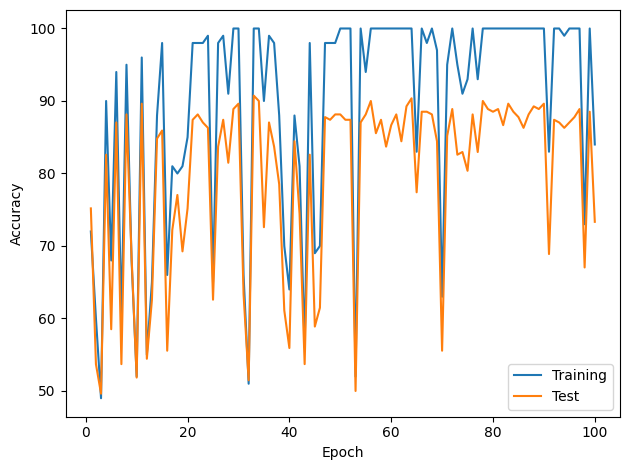

In [ ]:
plot_accuracy(train_acc_list, test_acc_list)

Comment on Model with BatchNorm preactivation and postactivation:
The model with BatchNorm preactivation peform slightly better than the model with postactivation. From the accuracy plot between the training and testing for the preactivation, the training accuracy is higher than the training of the post activation most of the time. And the testing accuracy of the preactivation, although still fluctuating a lot, have more epochs when it is at a higher accuracy comparing to the lower accuracy of the testing of the post activation BatchNorm Model.

# **Model**

In [ ]:
# Define transformation: resize, grayscale, and tensor conversion.
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

# Create train, val and test datasets
full_dataset = datasets.Caltech101(root='./data', download=True, transform=transform)

# we are going to use only these two classes
selected_classes = ['Faces', 'Faces_easy']
indices = [i for i, (img, label) in enumerate(full_dataset) if full_dataset.categories[label] in selected_classes]
subset = Subset(full_dataset, indices)
train_dataset, val_dataset, test_dataset = random_split(subset, [100, 500, 270])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.fc1 = nn.Linear(input_size, 15)
        self.fc2 = nn.Linear(15, 45)
        self.fc3 = nn.Linear(45, 30)
        self.fc4 = nn.Linear(30, 20)
        self.fc5 = nn.Linear(20, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x) # activation 1
        x = self.fc2(x)
        x = self.relu(x) # activation 2
        x = self.fc3(x)
        x = self.relu(x) # activation 3
        x = self.fc4(x)
        x = self.relu(x) # activation 4
        x = self.fc5(x)
        x = self.softmax(x)
        return x

# Instantiate the model
input_size = 32 * 32 * 1  # Input size of the images
num_classes = 2  # Number of classes
model = LogisticRegression(input_size, num_classes)

# def init_weights(m):
#     if isinstance(m, nn.Linear):
#         nn.init.normal_(m.weight, mean=0.0, std=0.0001)
#         if m.bias is not None:
#             nn.init.constant_(m.bias, 0.0)

# model.apply(init_weights)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

start_time = time.time()
minibatch_loss_list, train_acc_list, val_acc_list = [], [], []

for epoch in range(SETTINGS['num epochs']):
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
        features = features.to(device)
        targets = targets.to(device)

        # Forward pass
        logits = model(features)
        loss = F.cross_entropy(logits, targets)

        # Zero gradients, backprop, and update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        minibatch_loss_list.append(loss.item())
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1:03d}/{SETTINGS["num epochs"]:03d} '
                  f'| Batch {batch_idx:04d}/{len(train_loader):04d} '
                  f'| Loss: {loss.item():.4f}')

    # Evaluate on training and validation sets
    model.eval()
    with torch.no_grad():
        train_acc = compute_accuracy(model, train_loader, device=device)
        val_acc = compute_accuracy(model, val_loader, device=device)
        print(f'Epoch: {epoch+1:03d}/{SETTINGS["num epochs"]:03d} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Val Acc: {val_acc:.2f}%')
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

    elapsed = (time.time() - start_time) / 60
    print(f'Time elapsed: {elapsed:.2f} min')

elapsed = (time.time() - start_time) / 60
print(f'Total Training Time: {elapsed:.2f} min')

# Evaluate on the test set
test_acc = compute_accuracy(model, test_loader, device=device)
print(f'Test Accuracy: {test_acc:.2f}%')

Files already downloaded and verified
Epoch: 001/100 | Batch 0000/0007 | Loss: 0.6959
Epoch: 001/100 | Train Acc: 50.00% | Val Acc: 51.80%
Time elapsed: 0.03 min
Epoch: 002/100 | Batch 0000/0007 | Loss: 0.6935
Epoch: 002/100 | Train Acc: 50.00% | Val Acc: 51.80%
Time elapsed: 0.05 min
Epoch: 003/100 | Batch 0000/0007 | Loss: 0.6970
Epoch: 003/100 | Train Acc: 50.00% | Val Acc: 51.80%
Time elapsed: 0.07 min
Epoch: 004/100 | Batch 0000/0007 | Loss: 0.6905
Epoch: 004/100 | Train Acc: 50.00% | Val Acc: 51.80%
Time elapsed: 0.08 min
Epoch: 005/100 | Batch 0000/0007 | Loss: 0.6949
Epoch: 005/100 | Train Acc: 50.00% | Val Acc: 51.80%
Time elapsed: 0.10 min
Epoch: 006/100 | Batch 0000/0007 | Loss: 0.6864
Epoch: 006/100 | Train Acc: 50.00% | Val Acc: 51.80%
Time elapsed: 0.12 min
Epoch: 007/100 | Batch 0000/0007 | Loss: 0.6949
Epoch: 007/100 | Train Acc: 50.00% | Val Acc: 51.80%
Time elapsed: 0.14 min
Epoch: 008/100 | Batch 0000/0007 | Loss: 0.6845
Epoch: 008/100 | Train Acc: 50.00% | Val Acc: 

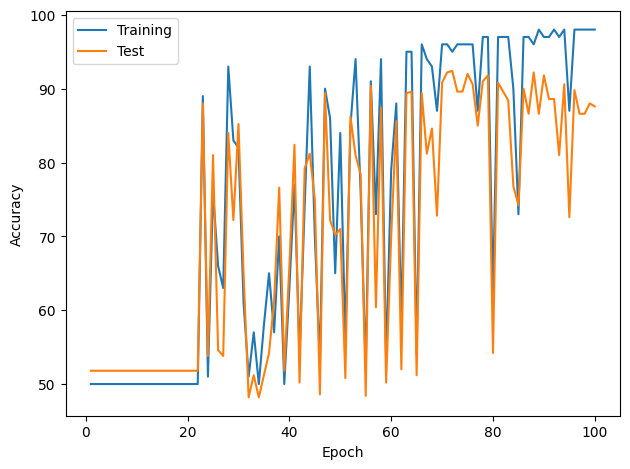

In [ ]:
plot_accuracy(train_acc_list, val_acc_list)

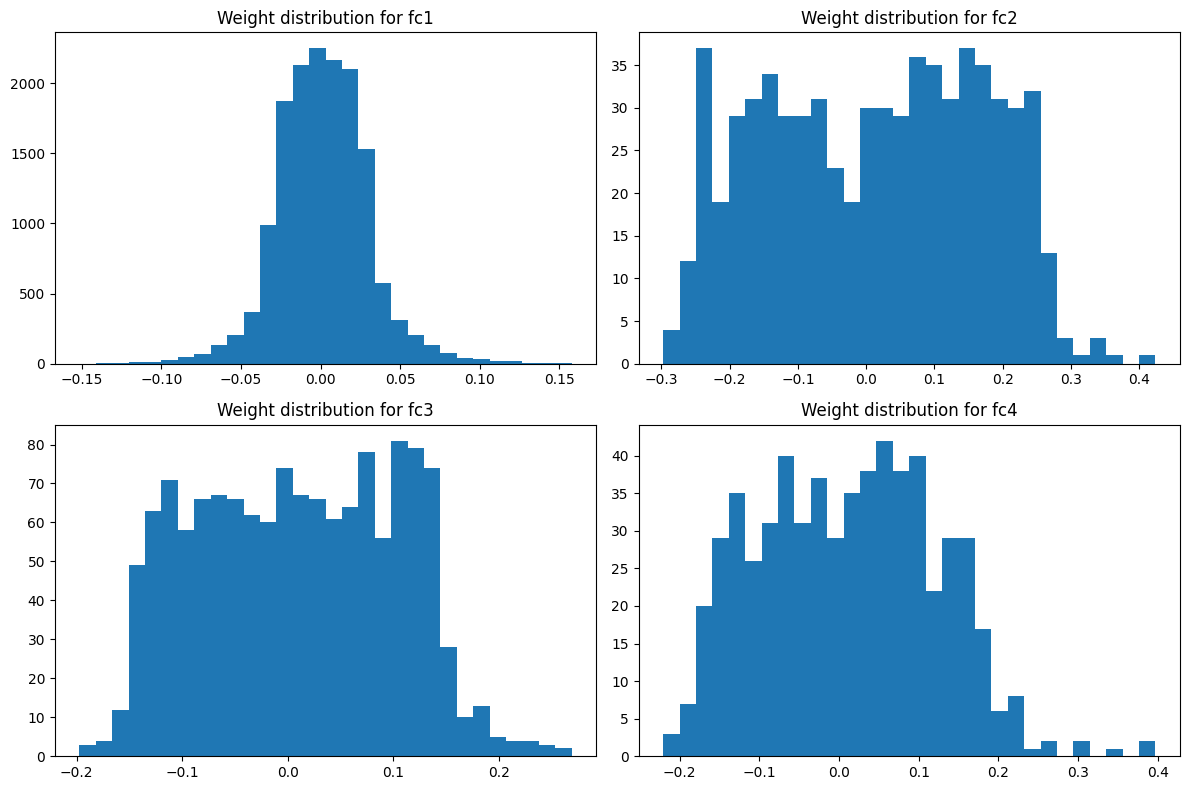

In [ ]:
hidden_layers = [model.fc1, model.fc2, model.fc3, model.fc4]
layer_names = ['fc1', 'fc2', 'fc3', 'fc4']

plt.figure(figsize=(12,8))
for i, layer in enumerate(hidden_layers):
    weights = layer.weight.data.cpu().numpy().flatten()
    plt.subplot(2, 2, i+1)
    plt.hist(weights, bins=30)
    plt.title(f'Weight distribution for {layer_names[i]}')
plt.tight_layout()
plt.show()

# **Model**


In [ ]:
# Define transformation: resize, grayscale, and tensor conversion.
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])
# Create train, val and test datasets
full_dataset = datasets.Caltech101(root='./data', download=True, transform=transform)
# we are going to use only these two classes
selected_classes = ['Faces', 'Faces_easy']
indices = [i for i, (img, label) in enumerate(full_dataset) if full_dataset.categories[label] in selected_classes]
subset = Subset(full_dataset, indices)
train_dataset, val_dataset, test_dataset = random_split(subset, [100, 500, 270])
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.fc1 = nn.Linear(input_size, 15)
        self.fc2 = nn.Linear(15, 45)
        self.fc3 = nn.Linear(45, 30)
        self.fc4 = nn.Linear(30, 20)
        self.fc5 = nn.Linear(20, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x) # activation 1
        x = self.fc2(x)
        x = self.relu(x) # activation 2
        x = self.fc3(x)
        x = self.relu(x) # activation 3
        x = self.fc4(x)
        x = self.relu(x) # activation 4
        x = self.fc5(x)
        x = self.softmax(x)
        return x
# Instantiate the model
input_size = 32 * 32 * 1  # Input size of the images
num_classes = 2  # Number of classes
model = LogisticRegression(input_size, num_classes)
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

model.apply(init_weights)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

start_time = time.time()
minibatch_loss_list, train_acc_list, val_acc_list = [], [], []

for epoch in range(SETTINGS['num epochs']):
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
        features = features.to(device)
        targets = targets.to(device)

        # Forward pass
        logits = model(features)
        loss = F.cross_entropy(logits, targets)

        # Zero gradients, backprop, and update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        minibatch_loss_list.append(loss.item())
        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1:03d}/{SETTINGS["num epochs"]:03d} '
                  f'| Batch {batch_idx:04d}/{len(train_loader):04d} '
                  f'| Loss: {loss.item():.4f}')

    # Evaluate on training and validation sets
    model.eval()
    with torch.no_grad():
        train_acc = compute_accuracy(model, train_loader, device=device)
        val_acc = compute_accuracy(model, val_loader, device=device)
        print(f'Epoch: {epoch+1:03d}/{SETTINGS["num epochs"]:03d} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Val Acc: {val_acc:.2f}%')
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

    elapsed = (time.time() - start_time) / 60
    print(f'Time elapsed: {elapsed:.2f} min')

elapsed = (time.time() - start_time) / 60
print(f'Total Training Time: {elapsed:.2f} min')

# Evaluate on the test set
test_acc = compute_accuracy(model, test_loader, device=device)
print(f'Test Accuracy: {test_acc:.2f}%')

Files already downloaded and verified
Epoch: 001/100 | Batch 0000/0007 | Loss: 0.6725
Epoch: 001/100 | Train Acc: 47.00% | Val Acc: 49.80%
Time elapsed: 0.02 min
Epoch: 002/100 | Batch 0000/0007 | Loss: 0.7241
Epoch: 002/100 | Train Acc: 48.00% | Val Acc: 49.60%
Time elapsed: 0.04 min
Epoch: 003/100 | Batch 0000/0007 | Loss: 0.6814
Epoch: 003/100 | Train Acc: 58.00% | Val Acc: 56.80%
Time elapsed: 0.06 min
Epoch: 004/100 | Batch 0000/0007 | Loss: 0.6501
Epoch: 004/100 | Train Acc: 52.00% | Val Acc: 49.60%
Time elapsed: 0.08 min
Epoch: 005/100 | Batch 0000/0007 | Loss: 0.7026
Epoch: 005/100 | Train Acc: 52.00% | Val Acc: 49.80%
Time elapsed: 0.10 min
Epoch: 006/100 | Batch 0000/0007 | Loss: 0.7849
Epoch: 006/100 | Train Acc: 73.00% | Val Acc: 68.60%
Time elapsed: 0.12 min
Epoch: 007/100 | Batch 0000/0007 | Loss: 0.6033
Epoch: 007/100 | Train Acc: 55.00% | Val Acc: 51.80%
Time elapsed: 0.14 min
Epoch: 008/100 | Batch 0000/0007 | Loss: 0.6861
Epoch: 008/100 | Train Acc: 72.00% | Val Acc: 

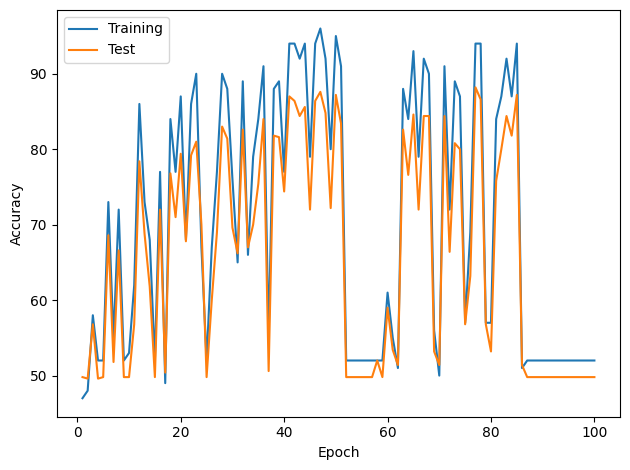

In [ ]:
plot_accuracy(train_acc_list, val_acc_list)

2)
d. Comment on the weights distribution: In the model without the weight initialization, after the first hidden layer, the weight does not follow a normal distribution anymore. Instead, each of the value of the weight has somewhat similar count, indicating that all of these weights may hold equally important information for the model to learn.

In the model with He weight initialization, the distribution of the weight is always in a normal distribution all the time and they are all centered at 0.0. Allowing the model to learn more effectively and take into account the ReLu that has been used as our activation function.


2) e. Looking at the logs of the training, without the explicit weight initialization, the model's loss decreases steadily and resulting in a test accuracy of 88.89%. However, when using He weight initialization from a normal distribution (mean 0, standard deviation of 0.0001), the loss does not decrease very well and the test accuracy end up at 49.63%. In my model, this He weight initialization end up reducing the accuracy of my model.

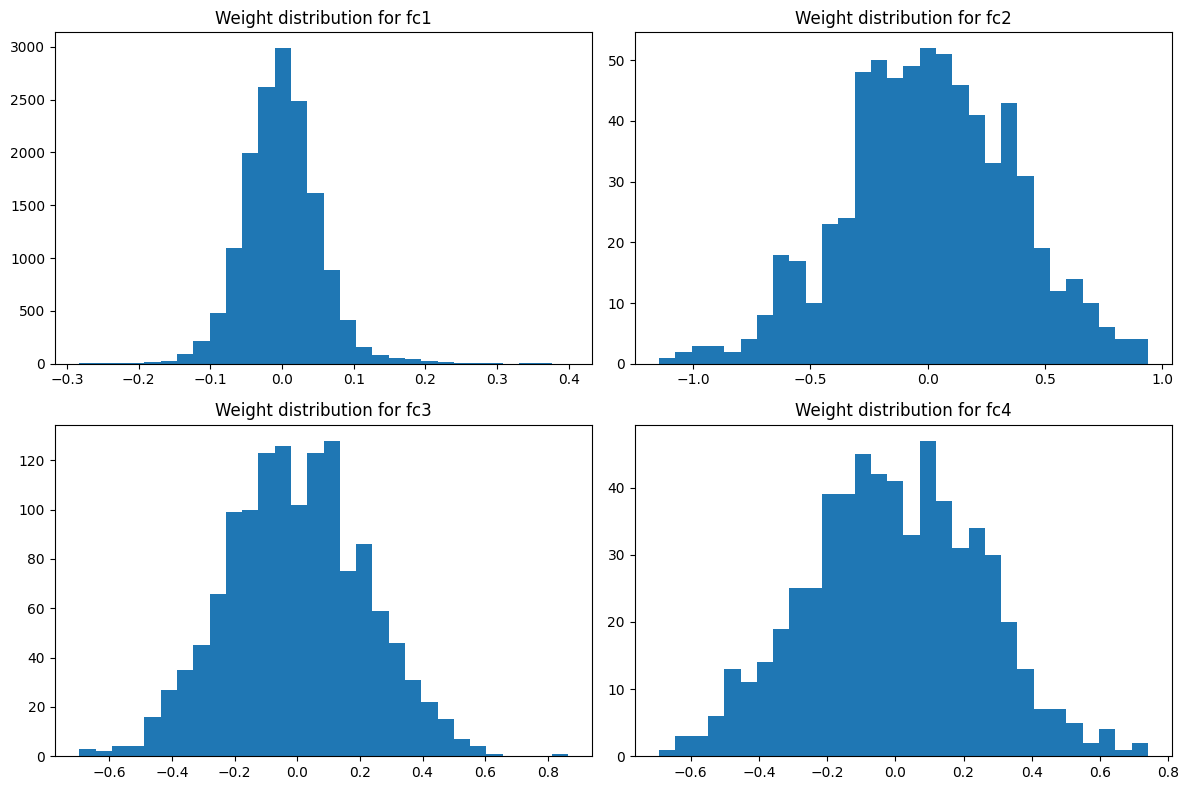

In [ ]:
hidden_layers = [model.fc1, model.fc2, model.fc3, model.fc4]
layer_names = ['fc1', 'fc2', 'fc3', 'fc4']

plt.figure(figsize=(12,8))
for i, layer in enumerate(hidden_layers):
    weights = layer.weight.data.cpu().numpy().flatten()
    plt.subplot(2, 2, i+1)
    plt.hist(weights, bins=30)
    plt.title(f'Weight distribution for {layer_names[i]}')
plt.tight_layout()
plt.show()